Name: Rishav Khatiwada

Uni_id: 2226139

Final Portfolio: Linear Regression 

In [109]:
# Necessary imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
# Connectiong to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:

path_datasets = "/content/drive/MyDrive/3.csv"

In [112]:
df = pd.read_csv(path_datasets)
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


Data Understanding:



The given data is from a power plant that has temperature, vaccum, pressure, humidity and power generation of that power plant.
 

In [113]:
# first 5 data of dataset
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


Checking what kind of data is present in the dataset

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


Data Cleaning:


In [115]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

Changing the name of the column. As the given dataset has AT, V, AP, PE, etc it will be easire to understand what data is.


In [116]:
df.rename(columns={'AT':'Temperature','V':'Vaccum','AP':'Pressure','RH':'Humidity','PE':'Power'}, inplace=True)



In [117]:
df.describe()

,Temperature,Vaccum,Pressure,Humidity,Power
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


Data Analysis and Visualization:


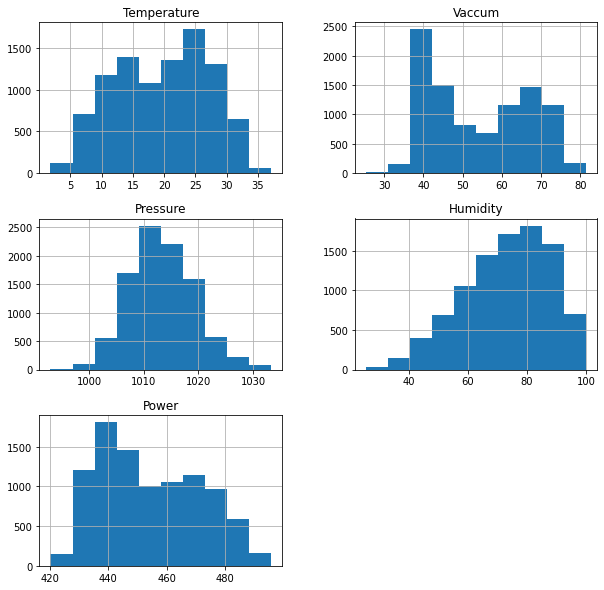

In [118]:
df.hist(figsize = (10,10))
plt.show()

In [119]:
x1 = df["Temperature"].to_numpy()
x2 = df["Vaccum"].to_numpy()
x3 = df["Pressure"].to_numpy()
x4 = df["Humidity"].to_numpy()
y = df["Power"].to_numpy()

In [120]:
# Sanity Check
if x1.shape == x2.shape == x3.shape ==x4.shape == y.shape:
  print("Proceed Further")
else:
  print("Array Conversion Error: Try Again")

Proceed Further


Seperating Independent variable from dependent variable:


In [121]:
# #Defining independent variale  as X and dependent variables as the Y  in the dataset 
X= df.iloc[: , :4] 
Y = df.iloc[: , -1] 

#testing the dataset
print(X.head())
print(Y.head())

   Temperature  Vaccum  Pressure  Humidity
0         8.34   40.77   1010.84     90.01
1        23.64   58.49   1011.40     74.20
2        29.74   56.90   1007.15     41.91
3        19.07   49.69   1007.22     76.79
4        11.80   40.66   1017.13     97.20
0    480.48
1    445.75
2    438.76
3    453.09
4    464.43
Name: Power, dtype: float64


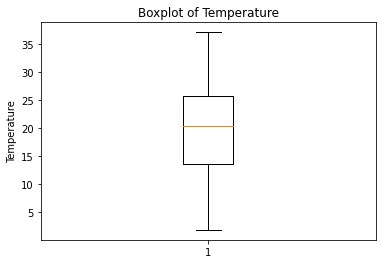

In [122]:
plt.boxplot(df["Temperature"])
plt.ylabel("Temperature")
plt.title('Boxplot of Temperature')
plt.show()

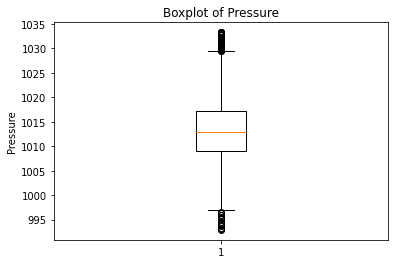

In [123]:
plt.boxplot(df["Pressure"])
plt.ylabel("Pressure")
plt.title('Boxplot of Pressure')
plt.show()

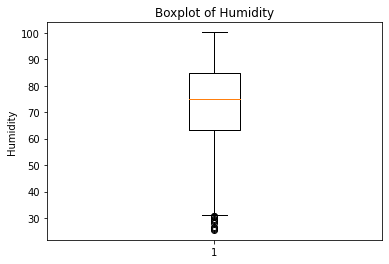

In [124]:
plt.boxplot(df["Humidity"])
plt.ylabel("Humidity")
plt.title('Boxplot of Humidity')
plt.show()

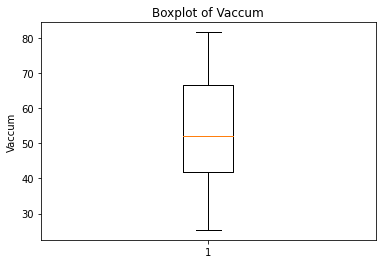

In [125]:
plt.boxplot(df["Vaccum"])
plt.ylabel("Vaccum")
plt.title('Boxplot of Vaccum')
plt.show()

Finding the co-relation between the independent and dependent variable.

Here we can see, temperature has the most corelation with power. Temperature and vaccum are negative which means that they are inversely proportional to power. whereas humidity and pressure are directly proportional to power.

In [126]:
num = df.corr()["Power"]
num

Temperature   -0.948128
Vaccum        -0.869780
Pressure       0.518429
Humidity       0.389794
Power          1.000000
Name: Power, dtype: float64

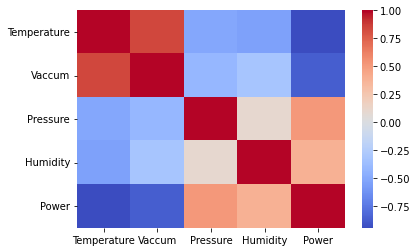

In [127]:
import seaborn as sns
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

In [128]:
def scatter(x):
  plt.scatter(x,y)
  plt.show()


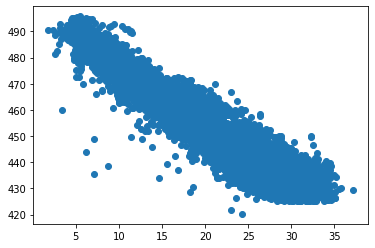

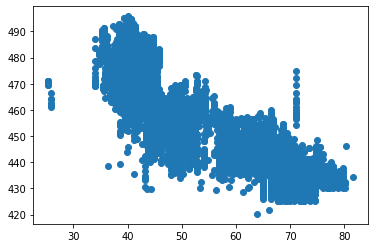

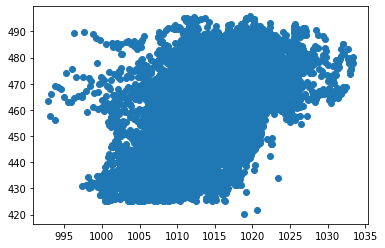

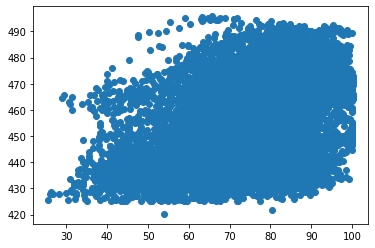

In [129]:
# Temperature
scatter(x1)
# Vaccum
scatter(x2)
# Pressure
scatter(x3)
# Humidity
scatter(x4)

Build Primary Model[Multiple Linear Regression]:

Seperating x train, x test, y train and y test using scikit-learn library.

In [130]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

In [131]:
from sklearn.preprocessing import StandardScaler

# create an instance of StandardScaler
scaler = StandardScaler ()

# use the fitted scaler to transform both the training and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [132]:
# initializing Matrices which act as an Container to hold our Data.
x0 = np.ones(len(X))
W = np.zeros(X_train.shape[1])
B = 0
Y_train.shape


(6697,)

In [133]:
#Define the cost function
def cost_function(X, Y, W,B):
   
    m = len(Y) # len of data in your datasets
   
    J = np.sum(((X.dot(W) + B) - Y) ** 2)/(2 * m)
    return J

In [134]:
inital_cost = cost_function(X_train, Y_train, W,B)
print(inital_cost)


103354.37809770046


In [135]:
def gradient_descent(X, Y, W, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        Y_pred = X.dot(W)+ B
        # Difference b/w Hypothesis and Actual Y
        loss = Y_pred - Y
        # Gradient Calculation
        dw = (X.T.dot(loss) ) / (m)
        db = np.sum(loss)/m
        # Changing Values of B using Gradient
        W = W - alpha * dw
        B = B - alpha - db
        # New Cost Value
        cost = cost_function(X, Y, W, B)
        cost_history[iteration] = cost
        
    return W, B, cost_history[-1]


In [136]:
 # Learning Rate:
alpha = 0.0001

new_power,new_bias, Updated_cost = gradient_descent(X_train, Y_train, W, B, alpha, 10000)
print(new_bias)
# New Values of
print(new_power)

# Final Cost of our Iterations.
print(Updated_cost)

454.33121252799765
[-6.69804196 -5.91621672  2.80082639  1.51293218]
18.17245315508432


In [137]:
y_pred = X_test.dot(new_power)+ new_bias

Model Evaluation:

In [138]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, y_pred)
print(r2)

0.8757107872346249


In [139]:
from sklearn import metrics
print('Mean Absolute error: ', metrics.mean_absolute_error(Y_test,y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

Mean Absolute error:  4.797437821459235
Mean Squared Error:  36.03520793617632
Root Mean Squared Error:  6.002933277671535


In [140]:
dataframe_new = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
dataframe_new

,Actual,Predicted
4834,426.18,435.823649
1768,451.10,452.009265
2819,442.87,443.781356
7779,443.70,449.718071
7065,460.59,458.088685
...,...,...
9339,440.27,442.759764
4871,438.42,442.525636
5128,442.88,444.257644
7947,456.64,457.330045


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


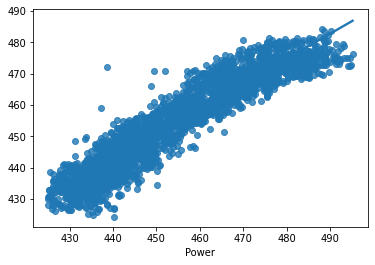

In [141]:
sns.regplot(Y_test,y_pred)
plt.show()

Dimensionality Reduction:

In [142]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Compute the covariance matrix
cov_matrix = np.cov(data_scaled.T)

# Compute the eigenvectors and eigenvalues
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

# Select the principal components
pca = PCA(n_components=2)
pca.fit(data_scaled)

# Project the data onto the principal components
data_reduced = pca.transform(data_scaled)
print(data_reduced)

[[-2.33736882  1.08010835]
 [ 0.79954976  0.25338256]
 [ 2.27900213 -1.11331645]
 ...
 [-1.20323779  0.11960114]
 [-0.55127137  0.68882797]
 [ 0.37630018 -0.02198774]]


In [143]:
X1= df.iloc[: , :4] 
Y1 = df.iloc[: , -1] 


In [144]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X1,Y1,test_size=0.3, random_state=0)
# create an instance of StandardScaler
scaler = StandardScaler ()

# use the fitted scaler to transform both the training and test data
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

In [145]:
W1 = np.zeros(X_train.shape[1])
B1 = 0

In [146]:
inital_cost1 = cost_function(X_train1, Y_train1, W1,B1)
print(inital_cost1)

103354.37809770046


In [147]:
alpha1 = 0.0001

new_power1,new_bias1, Updated_cost1 = gradient_descent(X_train1, Y_train1, W1, B1, alpha1, 10000)
print(new_bias1)
# New Values of
print(new_power1)

# Final Cost of our Iterations.
print(Updated_cost1)

454.33121252799765
[-6.69804196 -5.91621672  2.80082639  1.51293218]
18.17245315508432


In [148]:
y_pred1 = X_test1.dot(new_power1)+ new_bias1

In [149]:
y_pred1

array([435.82364865, 452.00926513, 443.78135632, ..., 444.25764448,
       457.3300454 , 470.59744568])

In [150]:
r2 = r2_score(Y_test1, y_pred1)
print(r2)

0.8757107872346249


Conclusion:


This module has accuracy of 87%.